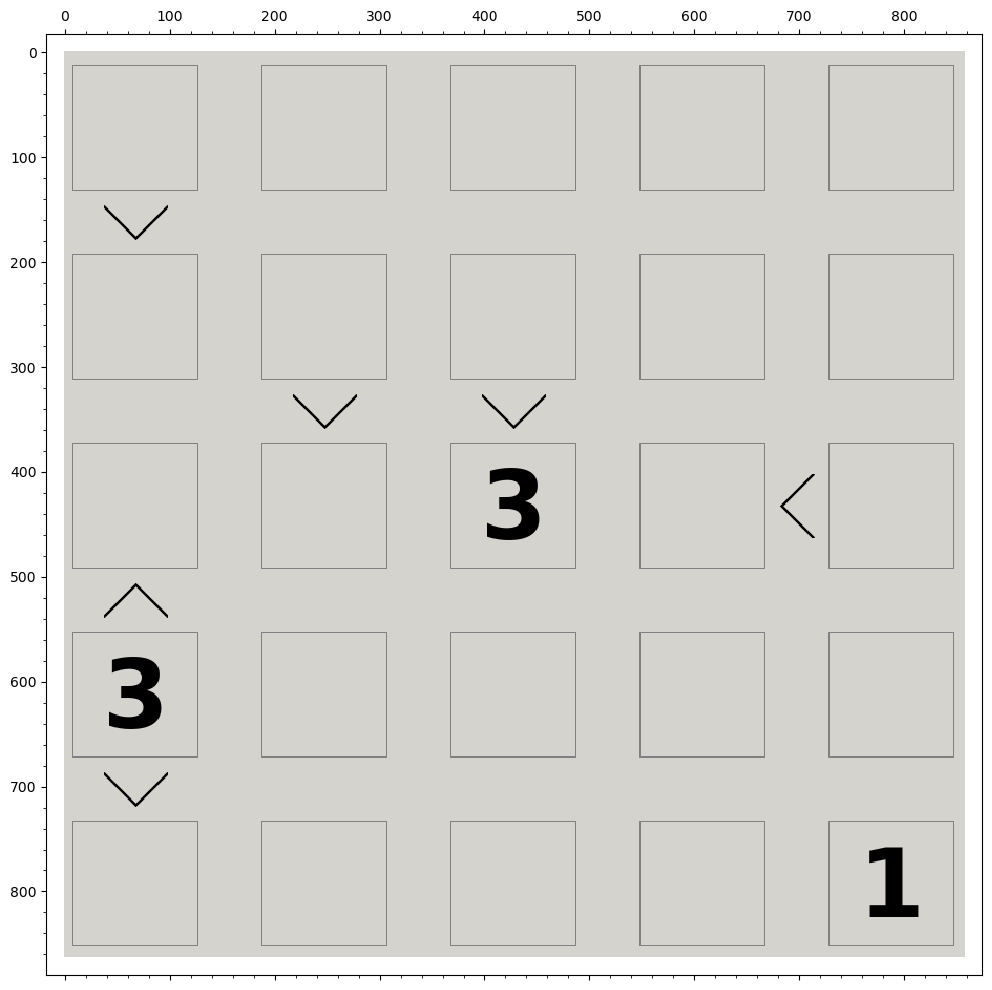

In [1]:
import pylab
I = pylab.imread('unequal_easy.png')
show(matrix_plot(I), figsize=15)

In [2]:
N = 5

#less than signs
less = [
    #vertical
    ((1,0),(0,0) ), ((2,0),(3,0) ), ((4,0),(3,0) ), 
    ((2,1),(1,1) ), ((2,2),(1,2) ),
    #horizontal
    ((2,3),(2,4) ),
]
#Hints
hints = [
 (2,2,3), (3,0,3), (4,4,1)
]

EASY1 = [N, less, hints]
Easy1Image = pylab.imread('unequal_easy.png'),129,44,680,600

In [3]:
N = 7

#less than signs
less = [
    #vertical
    ((0,0),(1,0) ), ((3,0),(2,0) ), ((4,0),(3,0) ), 
    ((0,1),(1,1) ), ((3,2),(2,2) ), ((3,2),(4,2) ),               
    ((6,2),(5,2) ), ((1,3),(2,3) ), ((1,4),(2,4) ), 
    ((3,5),(2,5) ), 
    #horizontal
    ((1,5),(1,6) ), ((2,0),(2,1) ), ((2,4),(2,3) ),
    ((3,2),(3,3) ), ((3,5),(3,4) ), ((3,6),(3,5) ),
    ((4,2),(4,3) ), ((5,0),(5,1) ), ((5,2),(5,3) ),
    ((6,0),(6,1) ), ((6,3),(6,2) ), ((6,5),(6,4) ),
]
#Hints
hints = [
 (5,4,5), (6,6,5)
]

EXTREME1 = [N, less, hints]
Extreme1Image = pylab.imread('unequal.png'),129,44,680,600

In [4]:
import numpy

def UnequalMILP(N, less, hints):
    non_ordered_pairs = [(n1,n2) for n1 in [1..N] for n2 in [1..N] if n1>=n2]
    
#    p = MixedIntegerLinearProgram(maximization=True, solver = "PPL")
#    p = MixedIntegerLinearProgram(maximization=True, solver = "Coin")
    p = MixedIntegerLinearProgram(maximization=True, solver = "GLPK")
    c = p.new_variable(binary=True)
    #c[j,k,n] = numero en la posicion j,k es n
    
    #Hints
    for j,k,n in hints:
        p.add_constraint(c[j,k,n]==1)

    #Solo un numero por casilla
    for j in range(N):
        for k in range(N):
            p.add_constraint(sum(c[j,k,n] for n in [1..N])<=1)

    #Solo un numero en cada fila
    for j in range(N):
        for n in [1..N]:
            p.add_constraint(sum(c[j,k,n] for k in range(N))<=1)

    #Solo un numero en cada columna
    for k in range(N):
        for n in [1..N]:
            p.add_constraint(sum(c[j,k,n] for j in range(N))<=1)

    #Less
    for (j1,k1), (j2,k2) in less:
        for n1,n2 in non_ordered_pairs:
            p.add_constraint(c[j2,k2,n2] + c[j1,k1,n1] <= 1)

    p.set_objective(
        sum(c[j,k,n] for j in range(N) for k in range(N) for n in [1..N]))
    return c,p

In [5]:
%%time
N, less, hints = EASY1
c, p = UnequalMILP(N, less, hints)
#print p.show()

CPU times: user 16.7 ms, sys: 3.62 ms, total: 20.3 ms
Wall time: 18.5 ms


In [6]:
print( p.solve())

25.0


In [7]:
d = p.get_values(c)
M = matrix(N, N)
for j in range(N):
    for k in range(N):
        for n in [1..N]:
            if d[j,k,n]:
                M[j,k]= n
M

[5 4 1 2 3]
[4 3 5 1 2]
[1 2 3 4 5]
[3 1 2 5 4]
[2 5 4 3 1]

Puedes repetir con un puzzle más difícil, pero podría tardar mucho...

In [6]:
%%time
N, less, hints = EXTREME1
c, p = UnequalMILP(N, less, hints)
#print p.show()

CPU times: user 42.9 ms, sys: 193 µs, total: 43.1 ms
Wall time: 41.7 ms
